In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import os
import time
import uuid
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [2]:
IMGS_PATH = os.path.join('data', 'images')
label = ['debuffed']

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd labelImg && python labelImg.py

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 1000 --data dataset.yaml --weights yolov5s.pt --workers 2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\timur/.cache\torch\hub\master.zip
YOLOv5  2023-6-3 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'debuffed.1e82bddb-e6d7-11ed-b116-00155d283c72.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 480x640 1 debuffed
Speed: 27.0ms pre-process, 468.9ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


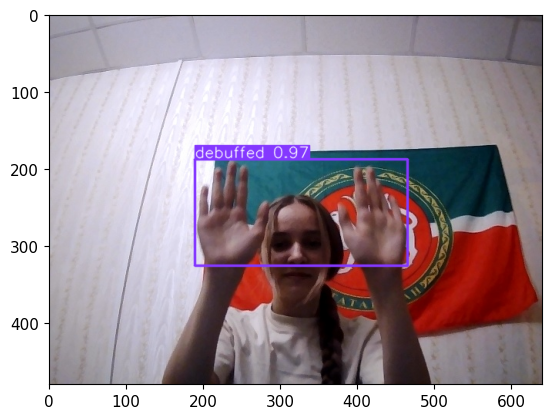

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()